In [3]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.rcParams.update({'font.size': 16})

In [8]:
import sklearn
print sklearn.__version__

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(sklearn.__version__)? (<ipython-input-8-2bf5b85f9f32>, line 2)

In [11]:
stock = np.loadtxt('../data/AAPL_170801-180823_minute.txt')
st_time = 1509670000
i_st =  np.argmax(stock[:,0]>st_time)
end_time = 1516000000
i_end =  np.argmax(stock[:,0]>end_time)
price = stock[i_st:i_end, 2]

fs = 1.

time = np.arange(price.shape[0]) 

In [12]:
price.shape[0]/60./6.5

47.53846153846154

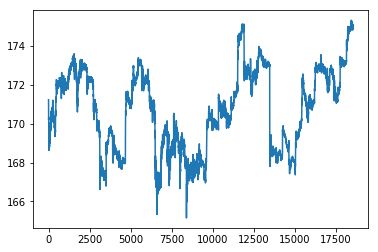

In [13]:
plt.plot(time, price)

In [15]:
freq = np.fft.rfftfreq(price.shape[0], 1/fs)

i_fmax = np.argmin(freq < 1/60.)
freq = freq[:i_fmax]

price_ft = np.real(np.fft.rfft(price, norm='ortho'))
price_ft = price_ft[:i_fmax]

In [17]:
i_pk = np.array(scipy.signal.find_peaks_cwt(price_ft, widths=np.array([4])))
print(i_pk.shape)

AttributeError: module 'scipy' has no attribute 'signal'

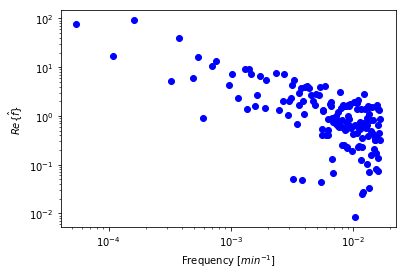

In [18]:
plt.plot(freq[1:], price_ft[1:], 'ob')
# plt.plot(freq[i_pk], price_ft[i_pk], 'or')
plt.xlabel(r'Frequency $[min^{-1}]$')
plt.ylabel(r'$Re\{\hat{f}\}$')
plt.yscale('log')
plt.xscale('log')

In [19]:
len(i_pk)

115